<a href="https://colab.research.google.com/github/osmarbraz/exemplos_gensim/blob/master/Exemplo_Word2Vec_Gensim_pt_br_Wikipedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo Word Embedding(pt-br) usando Gensim e Wikipedia(pt-br)

Exemplo de embendding usando Gensim Python Library com execução através do Google Colaboratory.<br>
É Biblioteca open-source para modelagem de tópicos não supervisionados e processamento de linguagem.
Implementado em Python e Cython. 
Projetado para lidar com grandes volumes de texto, usando fluxo de dados e algoritmos on-line incrementais. 
Seu diferencial em relação a maioria dos outros software para aprendizado de máquina os quais visam apenas o processamento em memória.<br>
https://radimrehurek.com/gensim/



https://medium.com/analytics-vidhya/word2vector-using-gensim-e055d35f1cb4

# Preparação do ambiente
Preparação do ambiente para executar o gensim.

##Tratamento de logs

In [1]:
#Biblioteca de logging
import logging

#Formato da mensagem
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Parâmetros
Parâmetros da execução do teste

In [2]:
#Id do arquivo no Google Drive
idArquivo ='0B0ZXk88koS2KRDcwcV9IVWFTeUE'

#Definição do nome do arquivo compactado do modelo
arquivoModeloCompactado = 'pt.zip'

#Definição do nome do arquivo do modelo
arquivoModelo = 'pt.bin'

logging.info('Parâmetros definidos!')

## Instalação

Instalando o gensim no Google Colaboratory.

No Jupiter Notebook executar através "Anaconda Prompt".


In [3]:
#!pip install -U gensim
!pip install -U gensim==3.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Instando o PyDrive no Google Colaboratory.

No Jupiter Notebook executar através "Anaconda Prompt".

PyDrive é uma biblioteca de manipulação de arquivos para o google drive.<br>

https://colab.research.google.com/notebooks/io.ipynb#scrollTo=7taylj9wpsA2

In [4]:
 pip install PyDrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Bibliotecas

Importando as bibliotecas de manipulação de dos arquivos pydrive.<br>
https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html#

In [5]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Biblioteca para descompactar o arquivo
import zipfile

#Biblioteca para acessar o sistema de arquivos
import os

logging.info('Import realizado!')

## Autenticação do usuário

O usuário precisar conceder  permissão para o **Google Cloud SDK** acessar o seu Google Colaboratory.

Copie o código de autorização da URL apresentada na janela aberta e copie e cole na caixa do código de autorização.


In [6]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Download
Para usar o Gensim, você pode criar o seu vetor de palavras e treiná-lo ou utilizar um dataset previamente treinado.

Neste apresentação utilizamos o dataset fornecido por Kyubyong Park, disponível em https://github.com/Kyubyong/wordvectors
São dados da Wikipidia Brasileira com:<br>
*   300 dimensões
*   1G Corpus
*   50246 vocabulário

É possível utilizar de :
http://nilc.icmc.usp.br/embeddings

Link para o arquivo no google drive:
https://drive.google.com/open?id=0B0ZXk88koS2KRDcwcV9IVWFTeUE<br>

O arquivo do download será colocado na pasta "**/content**" do Google Colaboratory.<br> Opcionalmente pode ser feito o download para uma pasta no Google Drive. Neste caso é necessário montar uma pasta no Google Drive no Google Colaboratory para receber o arquivo.

In [7]:
#verifica se o arquivo do modelo existe
if not os.path.exists(arquivoModeloCompactado):  
    #Realiza o download do arquivo
    downloaded = drive.CreateFile({'id':idArquivo})

    #salva o arquivo no diretório 'content' do colab
    downloaded.GetContentFile(arquivoModeloCompactado)

    logging.info('Arquivo {0} baixado'.format(arquivoModeloCompactado))
else:
    logging.info('Arquivo {0} já existe'.format(arquivoModeloCompactado))

Descompacta o arquivo do modelo.

In [8]:
with zipfile.ZipFile(arquivoModeloCompactado,"r") as zip_ref:
    zip_ref.extractall('.')
logging.info('Arquivo {0} descompactado'.format(arquivoModeloCompactado))

Mostra o diretório corrente e seus arquivos.

In [9]:
!pwd
!ls -la

/content
total 539104
drwxr-xr-x 1 root root      4096 Mar  1 20:49 .
drwxr-xr-x 1 root root      4096 Mar  1 20:47 ..
drwxr-xr-x 1 root root      4096 Mar  1 20:48 .config
-rw-r--r-- 1 root root   4051167 Mar  1 20:53 pt.bin
-rw-r--r-- 1 root root  60295280 Mar  1 20:53 pt.bin.syn0.npy
-rw-r--r-- 1 root root  60295280 Mar  1 20:53 pt.bin.syn1neg.npy
-rw-r--r-- 1 root root 224089398 Mar  1 20:53 pt.tsv
-rw-r--r-- 1 root root 203269084 Mar  1 20:49 pt.zip
drwxr-xr-x 1 root root      4096 Feb 28 14:45 sample_data


# Prepara o modelo
Carrega as bibliotecas e modelo pré treinado para executar os exemplos.

##Importando as bibliotecas do Gensim
Importa as biblitecas do Gensim para carregar o modelo pré treinado.

In [10]:
from IPython.display import display, HTML
from jinja2 import Template

import warnings
warnings.filterwarnings('ignore')

import numpy as np  
import gensim
from gensim.models import Word2Vec

logging.info('Import realizado!')

##Carregando o modelo

In [11]:
model = Word2Vec.load(arquivoModelo)
logging.info('Modelo carregado!')

Mostra alguns dados do modelo carregado para saber se ele foi carregado.

In [12]:
print(model)

Word2Vec(vocab=50246, size=300, alpha=0.025)


Mostra os dados da palavra rei.

In [13]:
model.most_similar('rei')

[('monarca', 0.7494288086891174),
 ('imperador', 0.7331966161727905),
 ('soberano', 0.7012052536010742),
 ('sultão', 0.6885693073272705),
 ('príncipe', 0.6859150528907776),
 ('faraó', 0.6376820206642151),
 ('governante', 0.6339693665504456),
 ('califa', 0.6284059286117554),
 ('trono', 0.62713623046875),
 ('condestável', 0.626724362373352)]

##Função de apresentação dos dados
Função para melhorar a apresentação dos dados dos exemplos.

In [14]:
table_list_template = """ 
<table> 
        <tr>  
           <th>Palavra</th>   
           <th>Similaridade</th>   
        </tr>  
        {% for item in items%}  
        <TR>     
           <TD class="c1">{{item[0]}}</TD>     
           <TD class="c2">{{item[1]}}</TD>   
        </TR>   
        {% endfor %}
</table> 
"""
def most_similar(positive, negative):
    nn = model.most_similar(positive=positive, negative=negative)
    tmpl = Template(table_list_template)
    output_html = tmpl.render(items=nn)
    return HTML(output_html)

logging.info('Função criada')

# Exemplos

**DICA**:<br>
Para palavras com sinais léxicos, utilizar o caractere "**u**" antes da mesma para codifica-la como utf-8.


## Comparando palavras diferentes

Rei + Mulher – Homem = ?

In [15]:
most_similar(positive=['rei','mulher'], negative=['homem'])


Palavra,Similaridade,esposa,0.6144844889640808,rainha,0.611359715461731,concubina,0.5916263461112976,infanta,0.5631893873214722,princesa,0.5480406880378723,meia-irmã,0.5469870567321777,sogra,0.5410431623458862,sobrinha,0.5393416881561279,consorte,0.5316817760467529,enteada,0.5275902152061462


Rainha + Homem – Mulher = ?

In [16]:
most_similar(positive=[u'rainha',u'homem'], negative=[u'mulher'])

Palavra,Similaridade,rei,0.5526444315910339,monarca,0.4919430911540985,soberano,0.4747419059276581,faraó,0.46988749504089355,lorde,0.4698619246482849,feiticeiro,0.4680941700935364,mago,0.4573228359222412,cavaleiro,0.44940516352653503,tirano,0.4414573609828949,governante,0.436655193567276


Brasil + Criminalidade = ?

In [17]:
most_similar(positive=['brasil',u'criminalidade'], negative=[])

Palavra,Similaridade,desemprego,0.5486825704574585,analfabetismo,0.5426269769668579,país,0.5171329975128174,narcotráfico,0.4638100266456604,violência,0.4453565180301666,japão,0.4394608736038208,tráfico,0.43780517578125,ceará,0.43459832668304443,corrupção,0.4236491620540619,paraná,0.4112812876701355


Outros exemplos:

In [18]:
most_similar(positive=['presidente'], negative=['poder'])

Palavra,Similaridade,vice-presidente,0.5688396692276001,ex-presidente,0.5431381464004517,diretor-presidente,0.49868297576904297,diretor-geral,0.48487648367881775,secretário-geral,0.46164095401763916,presidenta,0.46091073751449585,diretor,0.4383924901485443,presidiu,0.413305401802063,secretário,0.407117635011673,director,0.40545815229415894


In [19]:
most_similar(positive=['brasil','estudo'], negative=['carnaval'])

Palavra,Similaridade,melhoramento,0.45786750316619873,forense,0.4252932667732239,paleontologia,0.4232260584831238,mapeamento,0.4224932789802551,neurociência,0.4180487394332886,desenvolvimento,0.41441261768341064,aprimoramento,0.4095667004585266,biologia,0.40606528520584106,levantamento,0.4052814245223999,pesquisador,0.4032500088214874


In [20]:
most_similar(positive=['brasil','universidade'], negative=[])

Palavra,Similaridade,ufrgs,0.5644423365592957,faculdade,0.5495591759681702,ufrj,0.547903299331665,puc,0.5465572476387024,ufba,0.5446711778640747,ufsc,0.5425704121589661,puc-rio,0.5409955978393555,ufpr,0.5374286770820618,uerj,0.534567654132843,unb,0.5338500738143921


In [21]:
most_similar(positive=[u'homem',u'máquina'], negative=[])

Palavra,Similaridade,criatura,0.5730695724487305,maquina,0.5264643430709839,andróide,0.520221471786499,robô,0.5179541110992432,mente,0.5079346299171448,rapaz,0.5008567571640015,indivíduo,0.4992363452911377,pessoa,0.49798405170440674,monstro,0.4947267770767212,demônio,0.4884161353111267


In [22]:
most_similar(positive=[u'palio',u'vw'], negative=[u'fiat'])

Palavra,Similaridade,passat,0.712925910949707,escort,0.6524723768234253,wd,0.6207202076911926,vectra,0.5918048024177551,sedã,0.591141939163208,sx,0.5873299241065979,pick-up,0.5720714926719666,wagon,0.5702877640724182,coupé,0.5611929893493652,chevrolet,0.5557495951652527


In [23]:
most_similar(positive=[u'roma',u'alemanha'], negative=[u'itália'])

Palavra,Similaridade,berlim,0.6261874437332153,constantinopla,0.5816317200660706,viena,0.5595096945762634,atenas,0.5329298377037048,munique,0.5300965905189514,nuremberga,0.5072953701019287,basileia,0.49195024371147156,mogúncia,0.48629167675971985,moscou,0.48231738805770874,jerusalém,0.4798382520675659


In [24]:
most_similar(positive=[u'lendo',u'jogado'], negative=[u'lido'])

Palavra,Similaridade,jogando,0.6318348050117493,treinando,0.5323308706283569,mexendo,0.5291001796722412,brincando,0.5140507221221924,pulando,0.513100266456604,pegando,0.5071084499359131,conversando,0.4930493235588074,caçando,0.4889841079711914,dormindo,0.48623234033584595,arrumando,0.48261088132858276


In [25]:
most_similar(positive=[u'nuvens',u'estrela'], negative=[u'nuvem'])

Palavra,Similaridade,estrelas,0.6460617780685425,franjas,0.4863198399543762,luzes,0.4823385775089264,calotas,0.4765215516090393,luas,0.4707491993904114,serras,0.4684773087501526,constelações,0.466329425573349,montanhas,0.4661306142807007,raias,0.4655386805534363,pombas,0.4616527259349823


In [26]:
most_similar(positive=[u'tenista',u'futebol'], negative=[u'tênis'])

Palavra,Similaridade,futebolista,0.6371703743934631,basquetebolista,0.6129305362701416,ciclista,0.610839307308197,automobilista,0.6076284050941467,ex-futebolista,0.6029376983642578,pugilista,0.5458148717880249,ex-atleta,0.5337576866149902,judoca,0.5130996704101562,atleta,0.5124358534812927,ginasta,0.5090248584747314


In [27]:
most_similar(positive=[u'tenista',u'xadrez'], negative=[u'tênis'])	

Palavra,Similaridade,enxadrista,0.6550182104110718,automobilista,0.49404847621917725,ginasta,0.47963181138038635,ciclista,0.4784576892852783,basquetebolista,0.47705739736557007,ex-ginasta,0.4660647213459015,ex-futebolista,0.46401160955429077,alekhine,0.4611126184463501,judoca,0.4517190456390381,ex-atleta,0.44765692949295044


## Comparando palavras iguais

Frase de exemplo

In [28]:
texto = "Depois de roubar o cofre do banco,"\
        " o ladrão de banco foi visto " \
        "sentado no banco da praça central."

logging.info('Texto armazenado!')

In [29]:
palavras = [texto.split()]
print(palavras)

[['Depois', 'de', 'roubar', 'o', 'cofre', 'do', 'banco,', 'o', 'ladrão', 'de', 'banco', 'foi', 'visto', 'sentado', 'no', 'banco', 'da', 'praça', 'central.']]


Carrega o vocabulário do modelo somente com as palavras dos texto

In [30]:
model1 = Word2Vec(palavras, min_count=1)
print(model1)

Word2Vec(vocab=16, size=100, alpha=0.025)


Imprime o vocabulário.

In [31]:
words = list(model1.wv.vocab)
i = 0
for token in words:
   print(i, token)
   i = i + 1

0 Depois
1 de
2 roubar
3 o
4 cofre
5 do
6 banco,
7 ladrão
8 banco
9 foi
10 visto
11 sentado
12 no
13 da
14 praça
15 central.


A palavra banco possui somente uma entrada no modelo somente um conjunto de pesos.

In [32]:
print(model1['banco'])

[-1.5196378e-03  1.3965209e-03 -1.7442013e-03 -7.2486862e-04
  3.4840570e-03 -2.1737264e-03 -1.3928985e-03 -2.8777428e-03
 -4.5956080e-03  2.9019588e-03  2.3341500e-03 -3.1677841e-03
  2.8169751e-03  1.4798318e-03  4.0428183e-04 -3.0740125e-03
 -4.5007793e-03 -9.3982188e-04  1.1910388e-03 -3.6571394e-03
  2.7294138e-03 -2.8511544e-03 -4.2833868e-04 -1.3561479e-03
  6.3164270e-04 -1.6711794e-03  1.0772714e-03 -4.1857609e-03
  1.7294708e-03  2.7156638e-03  3.1397736e-03  3.5732516e-04
  3.4894284e-03  2.1354510e-03 -3.0212773e-03 -2.2751631e-03
  6.8476911e-06 -4.2859460e-03 -1.1114767e-04 -1.1176103e-03
 -3.6304442e-03  4.2150938e-03  4.6454482e-03  2.1674137e-03
 -4.5886002e-03 -2.1895119e-03  9.6467853e-04  4.7270847e-03
 -2.3676353e-03 -4.6977759e-03  3.7468662e-03 -4.8965723e-03
 -1.6074114e-03  1.7804458e-03 -2.5074033e-03  1.2725459e-03
 -2.5544479e-03  3.8126369e-03  4.9119494e-03 -2.8945412e-03
 -1.8702100e-04 -4.4162194e-03  4.1782488e-03 -4.6900366e-03
 -1.5630224e-03 -1.62372

# Plotando gráficos

Para plotar um conjunto de palavras execute o script abaixo:

In [33]:
# Import das bibliotecas
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_words(words):    
    #Carrega o vetor das palavras a serem plotadas
    vectors = []
    for word in words:    
         vectors.append(model[word])
    #Ajustar um modelo 2D de PCA aos vetores
    pca = PCA(n_components=2)
    resultado = pca.fit_transform(vectors)

    #Dimensões da figura
    plt.figure(figsize=(12,7))
    #Adiciona linha vertical
    plt.axvline()
    #Adiciona linha horizontal
    plt.axhline()

    #Criar um gráfico de dispersão da projeção
    plt.scatter(resultado[:, 0], resultado[:, 1])
    #Adiciona as palavras no gráfico
    for i in range(len(words)):
        plt.annotate(words[i], xy=(resultado[i, 0], resultado[i, 1]))        
        
    #Mostra o gráfico
    plt.show()
logging.info('Função criada')

O comando abaixo plota o gráfico das palavras especificadas.

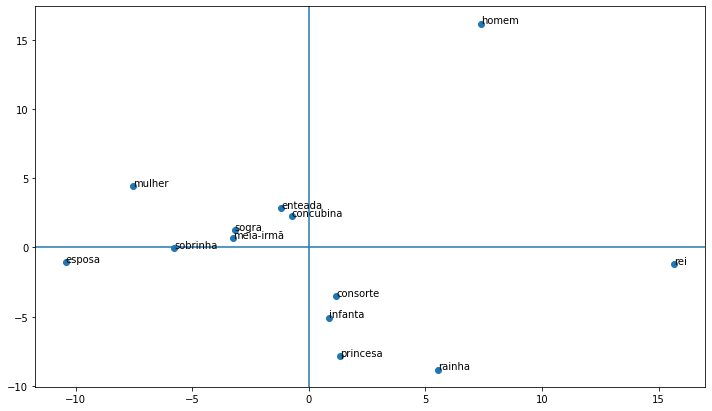

In [34]:
palavras = ['rei', 'rainha', 'homem', 'mulher','esposa','concubina', 'infanta','princesa','meia-irmã','sogra','sobrinha','consorte', 'enteada']
plot_words(palavras)

Lista as palavras do vocabulário

In [35]:
words = list(model.wv.vocab)
print(words)

['completada', 'sobrepõem', 'bloqueou', 'explodindo', 'woods', 'suzano', 'spiders', 'refletir', 'francesco', 'woody', 'suzana', 'telessérie', 'impotente', 'schlegel', 'sevens', 'canes', 'prazo', 'farão', 'igual', 'refletiu', 'hermann', 'hermano', 'apareçam', 'númenor', 'start.htm?sid', 'devoniano', 'biomas', 'trojan', 'cirúrgicas', 'capoeira', 'atingir', 'atingiu', 'unitária', 'broward', 'unitário', 'screaming', 'four', 'reparos', 'oponho', 'condessa', 'wednesday', 'uísque', 'moderadas', 'jazigo', 'detonautas', 'www.geocities.com', 'planejamento', 'candeia', 'kublai', 'moderado', 'cível', 'acordeon', 'lgbt', 'anulou', 'péssimas', 'francesca', 'marechal-de-campo', 'guardados', 'doutrinárias', 'semicircular', 'derrotado', 'itaporanga', 'distando', 'montevidéu', 'cicatriz', 'apelidou', 'usenet', 'sequencial', 'dialogo', 'numeral', 'ílhavo', 'crouch', 'dirigindo', 'romano-germânico', 'ching', 'linho', 'china', 'efetuado', 'efetuada', 'moderada', 'linha', 'mestres', 'kids', 'premissas', 'or

##Visualizando o modelo

Aqui tentamos visualizar a conexão entre as seguintes palavras em um subespaço 2D

### Função de visualização

In [36]:
#Import das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plotar_words(Wl):
    #Carrega o vetor das palavras a serem plotadas
    vectors = []
    for i in range(len(Wl)):
       vectors.append(model[Wl[i]])

    #Queremos um subespaço onde vectors[0]-vectors[1] e vectors[2]-vectors[3] sejam as linhas do eixo, 
    #então essas 4 palavras estão no eixo correspondente
    b1 = (vectors[1]-vectors[0])
    b2 = (vectors[3]-vectors[2])

    #Transforma a lista de embeddings em um vetor simples
    W = np.array(vectors)
    #Transforma as diferenças em um vetor simples
    B = np.array([b1,b2])
    #Calcula o pseudo-inversa de uma matriz
    Bi = np.linalg.pinv(B.T)

    #Multiplica Bi e W.T
    Wp = np.matmul(Bi,W.T)
    #Calcula os pivos
    Wp = (Wp.T-[Wp[0,2],Wp[1,0]]).T

    #Dimensões da figura
    plt.figure(figsize=(12,7))
    #Adiciona linha vertical
    plt.axvline()
    #Adiciona linha horizontal
    plt.axhline()
    #Criar um gráfico de dispersão da projeção
    plt.scatter(Wp[0,:], Wp[1,:])
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    eps = 0.005
    #Adiciona as palavras no gráfico
    for i, txt in enumerate(Wl):
        plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
    #Mostra o gráfico
    plt.show()

logging.info('Função criada')

#### Exemplo

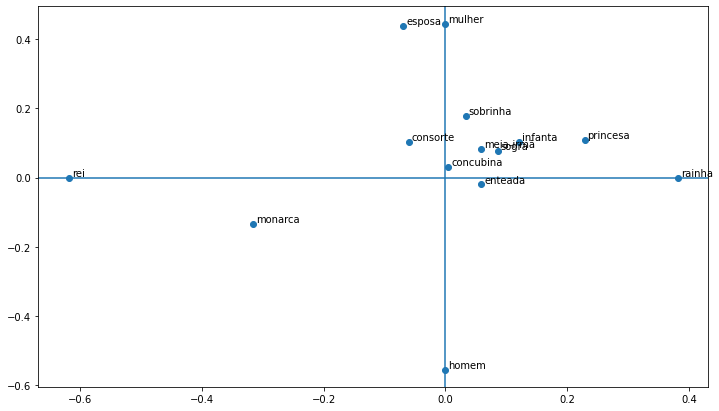

In [37]:
palavras =['rei', 'rainha', 'homem', 'mulher','esposa', 'monarca', 'concubina', 'infanta','princesa','meia-irmã','sogra','sobrinha','consorte', 'enteada']
plotar_words(palavras)

#### Detalhamento da função

Import das bibliotecas

In [38]:
#Import das bibliotecas
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Lista de palavras a serem visualizadas

In [39]:
#Lista das palavras
palavras = ['rei', 'rainha', 'homem', 'mulher','esposa', 'monarca', 'concubina', 'infanta','princesa','meia-irmã','sogra','sobrinha','consorte', 'enteada']

#Lista dos embeddings das palavras
Wv = []
for i in range(len(palavras)):
    Wv.append(model[palavras[i]])

Queremos um subespaço onde rei-rainha e homem-mulher são as linhas do eixo, então essas 4 palavras estão no eixo correspondente




In [40]:
#Diferença de Wv[1]-Wv[0]
b1 = (Wv[1]-Wv[0])
#Diferença de Wv[3]-Wv[2]
b2 = (Wv[3]-Wv[2])

Queremos que a base seja (1,0) e (0,1) do espaço projetado. Com uma matriz quadrada, devemos calcular a matriz inversa para obter os vetores base. No entanto, a matriz não quadrada tem apenas pseudo-inversa.

In [41]:
#Transforma a lista de embeddings em um vetor simples
W = np.array(Wv)
#Transforma as diferenças em um vetor simples
B = np.array([b1,b2])
#Calcula o pseudo-inversa de uma matriz
Bi = np.linalg.pinv(B.T)

In [42]:
#Mostra as dimensões de B e W
print(B.shape)
print(W.T.shape)

(2, 300)
(300, 14)


Projete todas as incorporações de palavras no subespaço 2D.

  Temos que mudar as linhas rei-rainha e homem-mulher para o eixo.

In [43]:
#Multiplica Bi e W.T
Wp = np.matmul(Bi,W.T)
print(Wp.shape)
#Calcula os pivos
Wp = (Wp.T-[Wp[0,2],Wp[1,0]]).T

(2, 14)


Vamos colocar as palavras no plano cartesiano!

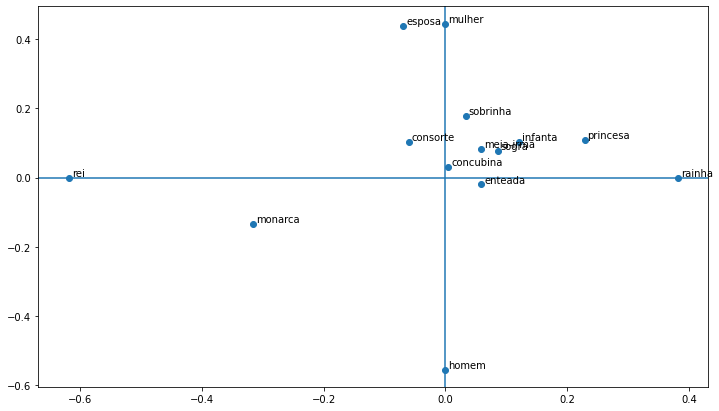

In [44]:
#Dimensões da figura
plt.figure(figsize=(12,7))
#Adiciona linha vertical
plt.axvline()
#Adiciona linha horizontal
plt.axhline()
#Plota eixo x e y
plt.scatter(Wp[0,:], Wp[1,:])
rX = max(Wp[0,:])-min(Wp[0,:])
rY = max(Wp[1,:])-min(Wp[1,:])
eps = 0.005
#Percore a lista de palavras
for i, txt in enumerate(palavras):
    plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
plt.show()

# Exemplo comparando os embeddings das ocorrências da palavra "banco" em uma sentença. 

## Comparando embeddings de palavras

In [45]:
texto = "Depois de roubar o cofre do banco ,"\
        " o ladrão de banco foi visto " \
        "sentado no banco da praça central."

logging.info('Texto armazenado!')

In [46]:
palavras = texto.split()
print(palavras)

['Depois', 'de', 'roubar', 'o', 'cofre', 'do', 'banco', ',', 'o', 'ladrão', 'de', 'banco', 'foi', 'visto', 'sentado', 'no', 'banco', 'da', 'praça', 'central.']


Confirmando os tokens do documento

In [47]:
i = 0
for token in palavras:
   print(i, token)
   i = i + 1

0 Depois
1 de
2 roubar
3 o
4 cofre
5 do
6 banco
7 ,
8 o
9 ladrão
10 de
11 banco
12 foi
13 visto
14 sentado
15 no
16 banco
17 da
18 praça
19 central.


Gera os embeddings

In [48]:
model = Word2Vec([palavras], min_count=1)

print(model)

Word2Vec(vocab=16, size=100, alpha=0.025)


Palavras recuperadas do modelo

In [49]:
words = list(model.wv.vocab)
i = 0
for token in words:
   print(i, token)
   i = i + 1

0 Depois
1 de
2 roubar
3 o
4 cofre
5 do
6 banco
7 ,
8 ladrão
9 foi
10 visto
11 sentado
12 no
13 da
14 praça
15 central.


Exibe os embenddings das palavras

A banco aparece somente no índices 6.

As outras ocorrências foram retiradas pois possuem a mesma representação.


In [50]:
# Índice das palavras a serem comparadas
palavra1 = 6
palavra2 = 11
palavra3 = 16

print("Os primeiros 5 valores de cada instância de \"banco\".")
print("")

print(str(words[palavra1]), model[words[palavra1]][:5])
print(str(words[palavra1]), model[words[palavra1]][:5])
print(str(words[palavra1]), model[words[palavra1]][:5])

Os primeiros 5 valores de cada instância de "banco".

banco [-0.00151764  0.00139946 -0.00174515 -0.00072592  0.00348608]
banco [-0.00151764  0.00139946 -0.00174515 -0.00072592  0.00348608]
banco [-0.00151764  0.00139946 -0.00174515 -0.00072592  0.00348608]


In [51]:
# Importando as bibliotecas
from scipy.spatial.distance import cosine

# Índice das palavras a serem comparadas
print("Período:", texto)
print("Palavra 1 =", palavra1, "=", str(words[palavra1]), "(instituição financeira)")
print("Palavra 2 =", palavra2, "=", str(words[palavra1]), "(instituição financeira)")
print("Palavra 3 =", palavra3, "=", str(words[palavra1]), "(assento)")

# Calcula a similaridade de coseno entre as palavras banco
# Em "ladrão de banco" versus "banco da praça" (diferentes significados).
#banco_diferente = doc[palavra2].similarity(doc[palavra3])
banco_diferente = 1 - cosine(model[words[palavra1]], model[words[palavra1]])

print("Vetor de similaridade  para diferentes significados(",palavra2,",",palavra3,"):  %.2f" % banco_diferente)

# Calcula a similaridade de coseno entre as palavras banco
# Em "ladrão de banco" versus "cofre do banco" (mesmo significado).
mesmo_banco = 1 - cosine(model[words[palavra1]], model[words[palavra1]])

print("Vetor de similaridade  para mesmo significado(",palavra2,",",palavra1,"):  %.2f" % mesmo_banco)

# Calcula a similaridade de coseno entre as palavras banco
# Em "cofre do banco" versus "banco da praça" (diferente significados).
banco_diferente2 = 1 - cosine(model[words[palavra1]], model[words[palavra1]])

print("Vetor de similaridade  para diferentes significados(",palavra3,",",palavra1,"):  %.2f" % banco_diferente2)

Período: Depois de roubar o cofre do banco , o ladrão de banco foi visto sentado no banco da praça central.
Palavra 1 = 6 = banco (instituição financeira)
Palavra 2 = 11 = banco (instituição financeira)
Palavra 3 = 16 = banco (assento)
Vetor de similaridade  para diferentes significados( 11 , 16 ):  1.00
Vetor de similaridade  para mesmo significado( 11 , 6 ):  1.00
Vetor de similaridade  para diferentes significados( 16 , 6 ):  1.00


# Exemplo de palavras individuais

In [52]:
texto = "pilha fila enfileirar empilhar"
palavras = [texto.split()]
print(palavras)

[['pilha', 'fila', 'enfileirar', 'empilhar']]


In [53]:
model = Word2Vec(palavras, min_count=1)

In [54]:
print(model['pilha'])

[ 4.7600097e-03 -6.6387490e-04  3.1394500e-03 -4.7373134e-03
 -1.8190820e-03 -4.0244004e-03 -1.9147793e-03  2.2169494e-03
  1.6091259e-04 -1.7045112e-03  4.9635987e-03  7.4822409e-04
  1.3057510e-03 -3.2099495e-03 -2.3627067e-03  2.8725173e-03
  4.2284233e-03 -4.7045955e-03 -3.1214934e-03 -2.9931257e-03
 -5.9513713e-04  1.1803816e-03 -3.3604208e-04 -9.4201394e-05
  3.0964892e-03 -4.8918719e-03 -2.4176342e-03 -8.7825290e-04
 -5.4881215e-04  3.0982346e-04  3.6597464e-03 -4.0100249e-03
  2.5192823e-03  3.7220102e-03  4.9341619e-03 -3.6278297e-03
  8.2149479e-04 -2.6249455e-03  5.1007979e-04  2.8605231e-03
  3.7435577e-03  2.7834231e-04 -1.7215497e-03 -2.6543855e-03
 -4.7063786e-03 -1.3024214e-03 -1.8881829e-03 -3.8599861e-03
 -1.1946538e-03 -1.4618625e-03  2.3803145e-03  9.5504790e-04
  3.1596324e-03 -2.4752961e-03  1.1758311e-03 -3.5963256e-03
 -1.0342604e-03  4.1802204e-03  1.3621979e-03  2.1339324e-03
 -1.4421700e-03  3.7730846e-03  4.2445241e-03  1.4912882e-03
 -1.2565758e-03  4.81102

In [55]:
print(model['fila'])

[ 8.2838361e-04  3.7640457e-03  8.4451065e-05  4.9373219e-03
  3.5928595e-03 -2.9715500e-03 -1.0122064e-03 -4.8333318e-03
  8.9984533e-04 -3.8338755e-03 -4.8742294e-03 -2.7015170e-03
 -2.3579851e-03  1.1317302e-03 -1.5240054e-03 -4.2321282e-03
 -4.6398141e-03  2.3844552e-03 -7.0717646e-04 -1.1716719e-03
  2.5490222e-03 -4.0940959e-03  4.8770220e-03 -9.2977920e-04
 -1.8844367e-03 -3.3250514e-03  3.7322906e-04  3.6148534e-03
 -1.8576644e-03 -2.4117483e-03  1.4021047e-04  1.4575005e-03
  2.5799596e-03 -2.1527178e-04  3.0352804e-04  1.9209611e-03
 -3.2734436e-03  4.3710168e-03 -2.3288291e-03  2.3339230e-03
  2.7112854e-03  1.8575672e-03  1.1470434e-05 -1.6211491e-03
  2.1404438e-03  1.1480823e-03 -4.8581818e-03  7.8776118e-04
  6.3351257e-04 -2.8059336e-03 -2.8346279e-03  2.0803548e-03
 -5.4404145e-04 -2.9363928e-03 -2.0472333e-04 -2.0037836e-03
 -3.6099894e-04  1.8506778e-03 -3.5689373e-03  2.0758566e-03
  4.5631258e-03 -3.5606429e-03  1.5839688e-03 -2.8751595e-03
  2.7492007e-03  2.68831

In [56]:
print(model['empilhar'])

[-3.6211337e-03  9.5557113e-04  2.9167573e-03  3.8221858e-03
 -1.8023615e-03 -7.3264621e-04 -2.5829235e-03  2.3258436e-03
  3.1031866e-03 -3.1980725e-03  6.3541974e-04  4.1338303e-03
 -4.4644764e-03 -2.8794818e-03 -1.4308592e-03  1.2776149e-03
  2.8713965e-03 -1.7084548e-03 -3.5287663e-03  3.7934936e-03
  6.7371374e-04 -4.1589574e-03 -2.2830947e-03  3.4376625e-03
 -3.8806433e-03 -2.4697776e-03 -2.7747795e-03 -3.9157975e-03
  2.2984731e-03 -1.8296463e-03  4.3815300e-03  2.9777689e-03
  4.0168222e-03 -2.0625407e-03  2.5437376e-04  9.8818657e-04
 -1.9045908e-03  3.3468055e-03 -4.2484123e-03  3.3704724e-04
 -2.3813843e-04  4.0964745e-03 -2.0128866e-03 -2.3247462e-03
 -3.8317195e-03 -3.9313738e-03  4.4198576e-03  8.9748041e-04
 -2.6243071e-03 -1.8410388e-03  4.6875663e-03  4.3175365e-03
  2.8912525e-03 -3.0833012e-03 -1.3985101e-03  2.3865520e-03
  5.1931944e-04 -1.7224044e-03  4.6213279e-03 -4.5949039e-03
  1.0822532e-03  3.1236631e-03  5.8235088e-04 -4.4804843e-04
  4.4027073e-03  1.36326

In [57]:
print(model['enfileirar'])

[ 5.9385860e-04  1.1381165e-03 -9.3679689e-04  2.1176548e-03
 -2.3667300e-03  4.5458525e-03 -1.1319900e-03  5.2983657e-04
 -2.6039768e-03 -1.7473638e-03  3.2479267e-03  1.9200882e-03
 -3.3222411e-03  3.1559763e-04 -3.6452306e-03  3.8887507e-03
 -2.3485373e-03  8.1706785e-06  3.3748206e-03 -1.9401109e-03
 -4.8663858e-03  2.8954130e-03  1.4183654e-03  3.9640171e-03
 -4.9802749e-03  3.9332560e-03 -4.4894023e-03  4.9037575e-03
  4.1716819e-04 -3.9358676e-04 -2.7507285e-03 -5.5182847e-04
  1.8799262e-03 -9.4795536e-04  1.4077469e-03  4.9803606e-03
  2.4219819e-03  2.7373964e-03  2.5636381e-03  5.6990375e-05
 -4.1463487e-03 -1.3709645e-03 -2.4809097e-03 -4.4202455e-03
 -3.1163131e-03 -3.7382075e-04  2.1442992e-03  1.7495663e-03
 -2.2444243e-03  4.9812514e-03 -2.2259934e-03  3.5623943e-03
 -3.1858685e-03  3.6165575e-03 -9.0363371e-04 -2.8167467e-03
 -2.1126543e-03  2.6719600e-03  4.5564580e-03  1.7766673e-03
 -7.5975142e-04  3.9952360e-03  1.2877523e-03  1.5720007e-03
 -2.8275445e-03  1.41911